# 검색량 확인

In [53]:
import urllib.request
import json
import pandas as pd
import re

client_id = ""
client_secret = ""

url = "https://openapi.naver.com/v1/datalab/search"
body = '''{"startDate":"2020-01-01","endDate":"2022-08-07","timeUnit":"month",
        "keywordGroups":[{"groupName":"전동킥보드주차","keywords": ["전동킥보드 주차", "전동킥보드주차"]}
        ]}''' # 검색

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200): # 정상처리 되면
    response_body = response.read()
    query=response_body.decode('utf-8')
    data_query=json.loads(query)
else: # 오류뜨면
    print("Error Code:" + rescode)

In [54]:
dates=[]
kurly_queries=[]
for i in data_query['results'][0]['data']:
    dates.append(i['period'])
    kurly_queries.append(i['ratio'])
    
    
df=pd.DataFrame([dates,kurly_queries,oasis_queries,hello_queries]).T
df.columns=['Date','mk','os','hn']

import datetime
df['Date']=df['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
df['Date']=df['Date'].apply(lambda x: x.strftime('%y%m'))

df['mk']=df['mk'].astype(int)
df['os']=df['os'].astype(str)
df['hn']=df['hn'].astype(str)

Text(0.5, 1.0, '네이버 검색 트렌드')

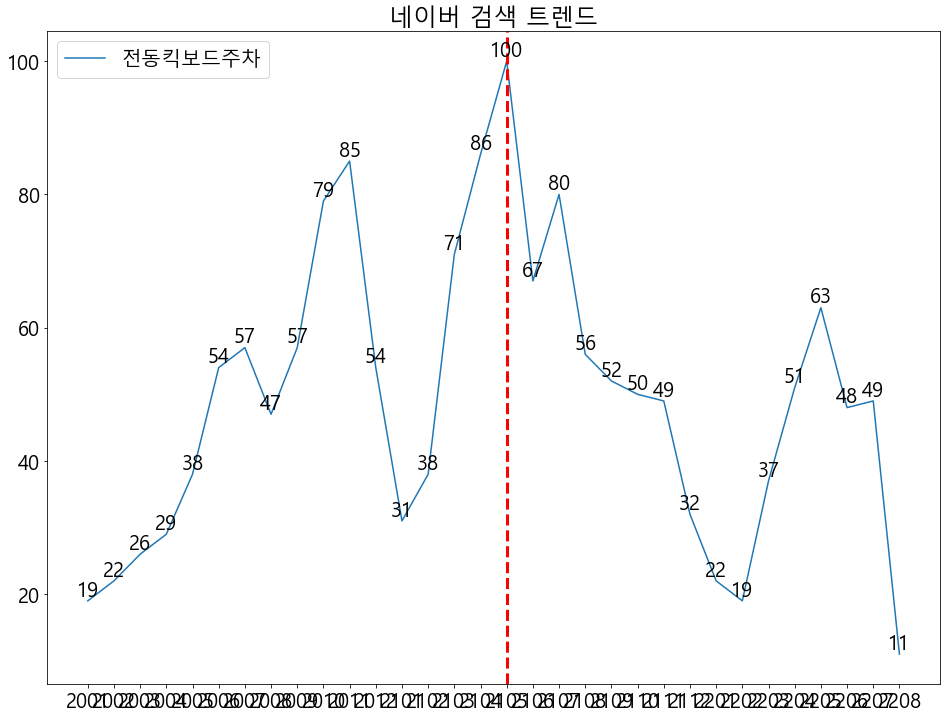

In [88]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.figure(figsize=(16,12))

plt.plot(df['Date'],df['mk'])
for i in range(len(df)):
    plt.text(i,df['mk'][i],df['mk'][i],fontsize=20, horizontalalignment='center', verticalalignment='bottom')

plt.axvline(x='2105', color='r', linestyle='--', linewidth=3)

plt.legend(['전동킥보드주차'],loc='upper left')
plt.title('네이버 검색 트렌드')